# **Exploratory Time Series Analysis**

## Content

* Descriptive Statistics with Rolling Windows.
* Lag Plots
* Seasonal Decomposition
* Statistical Tests for Stationarity
* Multivariate Time Series Plots

## [Data Source - Rossman Sales](https://www.kaggle.com/c/rossmann-store-sales/data)

In [1]:
# ------------Imports------------

import ipywidgets as widgets
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display
from plotly.subplots import make_subplots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# ----------Read Data------------------
# Assuming train.csv is in your project root.

df = pd.read_csv("train.csv", parse_dates=["Date"], index_col="Date")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Date,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1
2015-07-31,2,5,6064,625,1,1,0,1
2015-07-31,3,5,8314,821,1,1,0,1
2015-07-31,4,5,13995,1498,1,1,0,1
2015-07-31,5,5,4822,559,1,1,0,1


In [ ]:
# -----Analysis for Store 1---------

df = df.loc[df["Store"] == 1]
df["year"] = df.index.year
df["month"] = df.index.month

In [ ]:
df.index  # .year.value_counts().index.tolist()

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
               '2015-07-23', '2015-07-22',
               ...
               '2013-01-10', '2013-01-09', '2013-01-08', '2013-01-07',
               '2013-01-06', '2013-01-05', '2013-01-04', '2013-01-03',
               '2013-01-02', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [ ]:
# -----Create a Dropdown for selecting Year of analysis--------

w = widgets.Dropdown(
    options=df["year"].value_counts().index.tolist(),
    value=2013,
    description="Task:",
)
display(w)

Dropdown(description='Task:', index=1, options=(2014, 2013, 2015), value=2013)

In [ ]:
year = w.value

In [ ]:
data = df.loc[df["year"] == year]
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month
Date,,,,,,,,,,
2013-12-31,1,2,2362,298,1,0,0,1,2013,12
2013-12-30,1,1,7193,796,1,0,0,1,2013,12
2013-12-29,1,7,0,0,0,0,0,1,2013,12
2013-12-28,1,6,5659,716,1,0,0,1,2013,12
2013-12-27,1,5,6110,737,1,0,0,1,2013,12


# **Descriptive statistics with rolling window**

## Time Plot

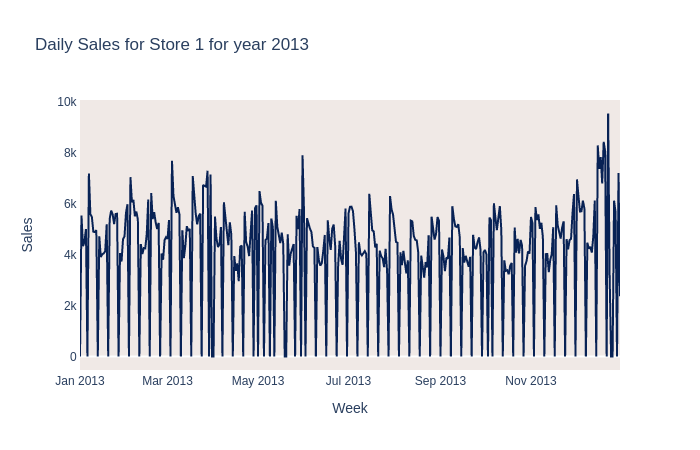

In [ ]:
layout = go.Layout(plot_bgcolor="#F0E9E6")
fig = go.Figure(layout=layout)

fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"],
        line=dict(color="#082255", width=2),
        mode="lines",
    )
)

fig.update_layout(
    title=f"Daily Sales for Store 1 for year {year}",
    xaxis_title="Week",
    yaxis_title="Sales",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show("png")  # Remove "png" to get html view

## **Rolling Mean**<br>
This comes handy to check if the time series is Mean stationary.

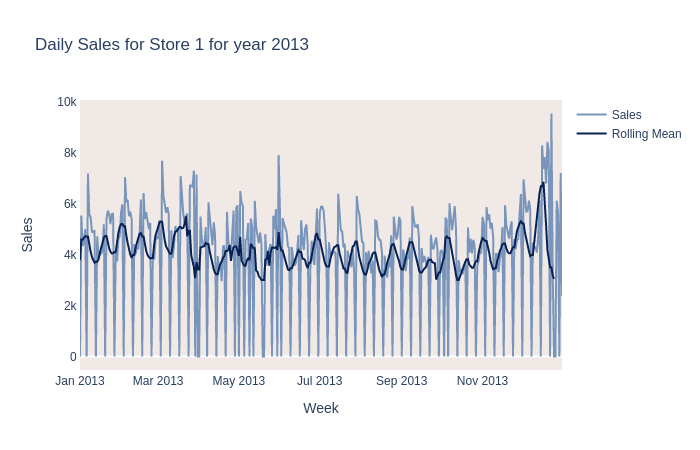

In [ ]:
layout = go.Layout(plot_bgcolor="#F0E9E6")
fig = go.Figure(layout=layout)

fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"],
        line=dict(color="#7A95BB", width=2),
        mode="lines",
        name="Sales",
    )
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"].rolling(7).mean(),
        line=dict(color="#082255", width=2),
        mode="lines",
        name="Rolling Mean",
    )
)

fig.update_layout(
    title=f"Daily Sales for Store 1 for year {year}",
    xaxis_title="Week",
    yaxis_title="Sales",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show("png")  # Remove "png" to get html view

## **Rolling Mean with Standard Deviations**
This comes in handy for checking if the Time Series is Variance Stationary.

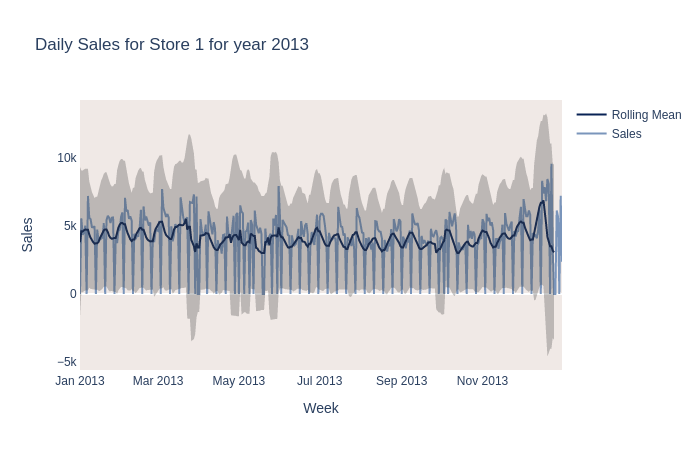

In [ ]:
rolling_std = data["Sales"].rolling(7).std()

layout = go.Layout(plot_bgcolor="#F0E9E6")
fig = go.Figure(layout=layout)

fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"],
        line=dict(color="#7A95BB", width=2),
        mode="lines",
        name="Sales",
    )
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"].rolling(7).mean(),
        line=dict(color="#082255", width=2),
        mode="lines",
        name="Rolling Mean",
    )
)

fig.add_trace(
    go.Scatter(
        name="Upper Bound",
        x=data.index,
        y=data["Sales"].rolling(7).mean() + (2 * rolling_std),
        mode="lines",
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False,
    )
)
fig.add_trace(
    go.Scatter(
        name="Lower Bound",
        x=data.index,
        y=data["Sales"].rolling(7).mean() - (2 * rolling_std),
        marker=dict(color="#444"),
        line=dict(width=0),
        mode="lines",
        fillcolor="rgba(68, 68, 68, 0.3)",
        fill="tonexty",
        showlegend=False,
    )
)

fig.update_layout(
    title=f"Daily Sales for Store 1 for year {year}",
    xaxis_title="Week",
    yaxis_title="Sales",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show("png")  # Remove "png" to get html view

## **Rolling Mean with Exponential Weighted Mean**

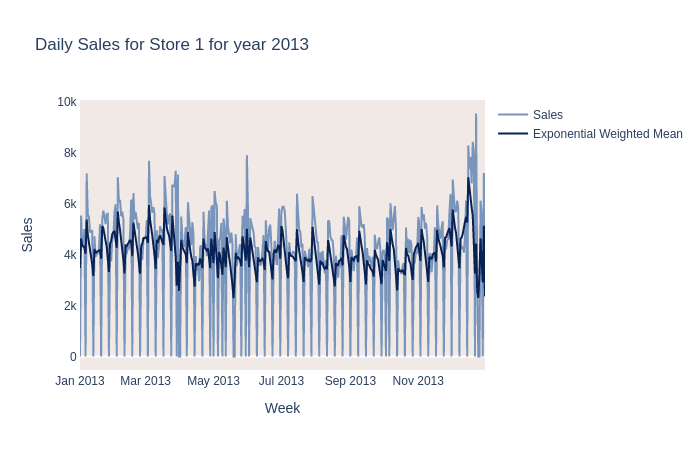

In [ ]:
layout = go.Layout(plot_bgcolor="#F0E9E6")
fig = go.Figure(layout=layout)

fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"],
        line=dict(color="#7A95BB", width=2),
        mode="lines",
        name="Sales",
    )
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"].ewm(span=7).mean(),
        line=dict(color="#082255", width=2),
        mode="lines",
        name="Exponential Weighted Mean",
    )
)

fig.update_layout(
    title=f"Daily Sales for Store 1 for year {year}",
    xaxis_title="Week",
    yaxis_title="Sales",
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show("png")  # Remove "png" to get html view

# **Lag Plots**
To check how the Time Series Correlates to itself across different Time Lags.

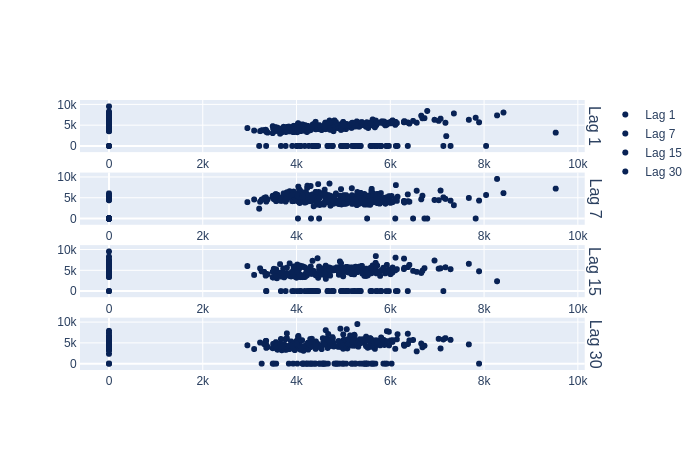

In [ ]:
layout = go.Layout(plot_bgcolor="#F0E9E6")
# fig = go.Figure(layout=layout)

fig = make_subplots(
    rows=4,
    cols=1,
    row_heights=[
        0.25,
        0.25,
        0.25,
        0.25,
    ],
    # figure=fig,
    row_titles=["Lag 1", "Lag 7", "Lag 15", "Lag 30"],
)
fig.add_trace(
    go.Scatter(
        x=data["Sales"],
        y=data["Sales"].shift(1),
        line=dict(color="#082255", width=2),
        mode="markers",
        name="Lag 1",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=data["Sales"],
        y=data["Sales"].shift(7),
        line=dict(color="#082255", width=2),
        mode="markers",
        name="Lag 7",
    ),
    row=2,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=data["Sales"],
        y=data["Sales"].shift(15),
        line=dict(color="#082255", width=2),
        mode="markers",
        name="Lag 15",
    ),
    row=3,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=data["Sales"],
        y=data["Sales"].shift(30),
        line=dict(color="#082255", width=2),
        mode="markers",
        name="Lag 30",
    ),
    row=4,
    col=1,
)
fig.show("png")  # Remove "png" to get html view

# **Auto Correlation and Partial Autocorrelation**

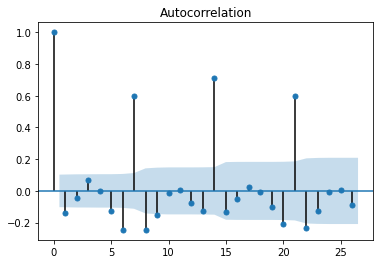

In [ ]:
acf_plotter = plot_acf(data["Sales"])
acf_plotter.show()

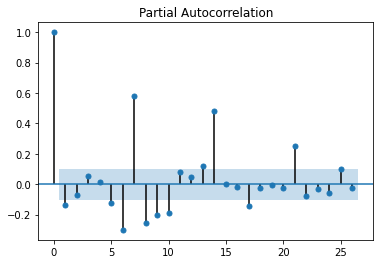

In [ ]:
acf_plotter = plot_pacf(data["Sales"])
acf_plotter.show()

**Inference**:
Significant Spikes at the **7th** Lag implies a Strong Seasonal Series.

# **Seasonal Decomposition**
Decompose the Time Series into its **Trend**, **Seasonality** and **Resdiuals** Components.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



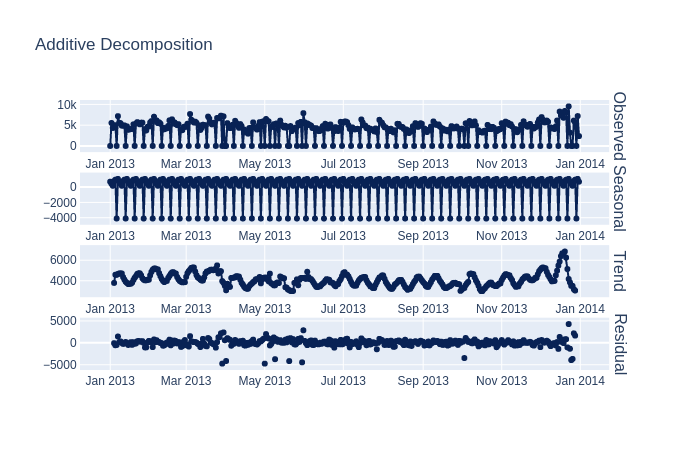

In [ ]:
decomp = seasonal_decompose(data["Sales"], freq=7)

layout = go.Layout(plot_bgcolor="#F0E9E6")
fig = go.Figure(layout=layout)

fig = make_subplots(
    rows=4,
    cols=1,
    row_heights=[
        0.25,
        0.25,
        0.25,
        0.25,
    ],
    # figure=fig,
    row_titles=["Observed", "Seasonal", "Trend", "Residual"],
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=decomp.observed,
        line=dict(color="#082255", width=2),
        mode="lines+markers",
        name="Original",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=decomp.seasonal,
        line=dict(color="#082255", width=2),
        mode="lines+markers",
        name="Seasonal",
    ),
    row=2,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=decomp.trend,
        line=dict(color="#082255", width=2),
        mode="lines+markers",
        name="Trend",
    ),
    row=3,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=decomp.resid,
        line=dict(color="#082255", width=2),
        mode="markers",
        name="Resdiuals",
    ),
    row=4,
    col=1,
)
fig.update_layout(
    showlegend=False,
    title="Additive Decomposition",
)

fig.show("png")  # Remove "png" to get html view

# **Tests Of Stationarity**
A Time-Series is stationary if it has:

* Constant Mean
* Constant Variance
* Constant Covariance<br>

A non-stationary time series is difficult to forecast. So we have to make sure that a Time Series has to be stationary before we fit a statistical model to it. How do we determine if a time series is stationary or not?
By using tailored tests for stationarity:

* **Augmented Dickey-Fuller unit root test**
* **Kwiatkowski-Phillips-Schmidt-Shin (“KPSS”) test**

### Augmented Dickey Fuller Test(ADF)
* **Null Hypothesis**-Series has a unit root.
* **Alternate Hypothesis**-Series has no unit root.

### Kwiatkowski-Phillips-Schmidt-Shin Test(KPSS)
* **Null Hypothesis**-The process is trend stationary.
* **Alternate Hypothesis**-The series has a unit root (series is not stationary).

**To ensure that the series is truly stationary, we need to apply both the above tests.**<br><br>
**Case 1** If both the tests fail for stationarity, the series is truly **non-stationary**.<br>
**Case 2** If both the tests pass for stationarity, the series is truly **stationary**.<br>
**Case 3** The KPSS test passes but ADF fails for staionarity, Series is **Trend Stationary**. Trend needs to be removed for ensuring strict stationarity.<br>
**Case 4** The KPSS test fails but ADF passes for staionarity, Series is **Difference Stationary**. Series needs to be differenced for ensuring stationarity.<br>

In [ ]:
# -------------Test for ADF and KPSS----------------


def adf_test(timeseries, summary_name):
    print(f"Results of Dickey-Fuller Test for {summary_name} :")
    print("----------------------------------------------------")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    print("\n")
    return dfoutput


def kpss_test(timeseries, summary_name):
    print(f"Results of KPSS Test for {summary_name} :")
    print("----------------------------------------------------")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)
    print("\n")
    return kpss_output


def test_stationarity(timeseries, summary_name, significance_level=0.05):
    adf_p_value = adf_test(timeseries, summary_name)["p-value"]
    kpss_p_value = kpss_test(timeseries, summary_name)["p-value"]
    print("----------------------------------------------------")
    if ((adf_p_value < significance_level) and
            (kpss_p_value > significance_level)):
        print("Series is Truly Sationary")
    elif ((adf_p_value > significance_level) and
          (kpss_p_value < significance_level)):
        print("Series is Non Sationary")
    elif ((adf_p_value > significance_level) and
          (kpss_p_value > significance_level)):
        print("Series is Trend Sationary-Remove the Trend")
    elif ((adf_p_value < significance_level) and
          (kpss_p_value < significance_level)):
        print("Series is Difference Staionary-Difference the Series")
    print("----------------------------------------------------")

In [ ]:
test_stationarity(data["Sales"], f"Sales for {year} and Store-1")

Results of Dickey-Fuller Test for Sales for 2013 and Store-1 :
----------------------------------------------------
Test Statistic                  -3.144714
p-value                          0.023416
#Lags Used                      13.000000
Number of Observations Used    351.000000
Critical Value (1%)             -3.449119
Critical Value (5%)             -2.869810
Critical Value (10%)            -2.571176
dtype: float64


Results of KPSS Test for Sales for 2013 and Store-1 :
----------------------------------------------------
Test Statistic           0.203633
p-value                  0.100000
Lags Used                1.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


----------------------------------------------------
Series is Truly Sationary
----------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1886: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




# **Categorical Features to Sales Association**

In [ ]:
# -----Create a Dropdown for selecting Categorical Variable for Analysis-------

w = widgets.Dropdown(
    options=["DayOfWeek", "Open", "Promo", "StateHoliday", "SchoolHoliday",
             "month"],
    value="month",
    description="Task:",
)
display(w)

Dropdown(description='Task:', index=5, options=('DayOfWeek', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',…

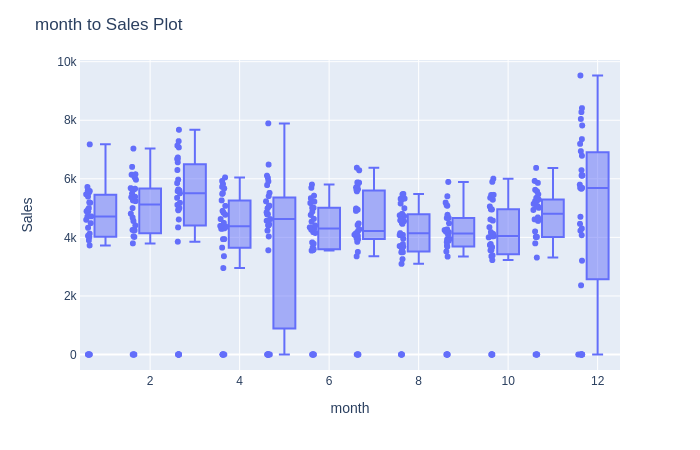

In [ ]:
df = px.data.tips()
fig = px.box(data, x=w.value, y="Sales", points="all")
fig.update_layout(
    title=f"{w.value} to Sales Plot",
)
fig.show("png")

# **Multivariate Time Series**

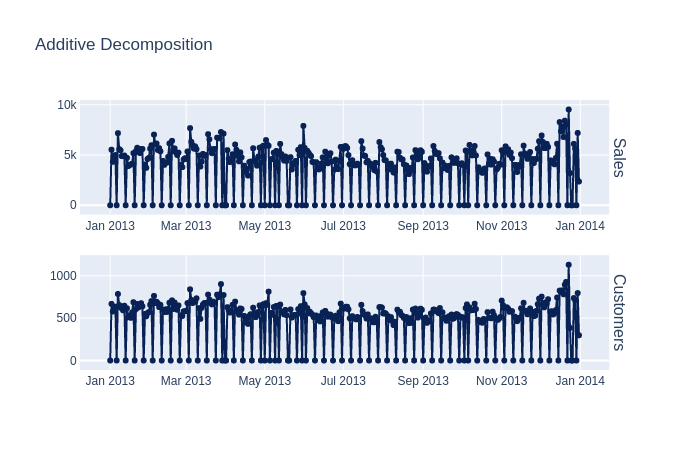

In [ ]:
layout = go.Layout(plot_bgcolor="#F0E9E6")
fig = go.Figure(layout=layout)

fig = make_subplots(
    rows=2,
    cols=1,
    row_heights=[5, 5],
    # figure=fig,
    row_titles=["Sales", "Customers"],
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Sales"],
        line=dict(color="#082255", width=2),
        mode="lines+markers",
        name="Sales",
    ),
    row=1,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=data.index,
        y=data["Customers"],
        line=dict(color="#082255", width=2),
        mode="lines+markers",
        name="Customers",
    ),
    row=2,
    col=1,
)

fig.update_layout(
    showlegend=False,
    title="Additive Decomposition",
)

fig.show("png")

# References
* [Exploratory Data Analysis](https://github.com/mloning/intro-to-ml-with-time-series-DSSGx-2020/blob/master/notebooks/02_exploratory_data_analysis.ipynb)

* [Statsmodels Example for ADF/KPSS](https://www.statsmodels.org/stable/examples/notebooks/generated/stationarity_detrending_adf_kpss.html)

Things to Do:

* Panel Data Exploration
* Adding more Statistical Tests
* Feature Extraction from Tabular Data
* Tabular exploratory data analysis 

This Notebook is Work in Progress.(Feedbacks needed)